In [1]:
#this is all the environment we need
!pip install cmake 'gym[atari]' scipy #functions: env.step,env.render and env.reset
import gym
import numpy as np
import random
from IPython.display import clear_output
import matplotlib.pyplot as plt
env = gym.make("Taxi-v3").env
env.render() #blue is the pick-up location and purple is the current destination

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+



In [2]:
# 4 locations, the job is to pick up the passenger at one location and drop him off at another
# 20 points--successful drop-off, -1 point for every time-step, -10 penalty for illegal pick-up and drop-off
#print("Action Space {}".format(env.action_space))
#0-south 1-north 2-east 3-west 4-pick 5-dropoff
#print("State Space {}".format(env.observation_space)) 500 25*5*4
#optimal action for each state is the actino that has the highest cumulative long-term reward

In [3]:
state = env.encode(2,2,0,2)#(pick up at R, drop off at Y)
print("the initial state space is:", state)# 242
env.s = state
env.render()

the initial state space is: 242
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+



In [4]:
print(env.P[242])

{0: [(1.0, 342, -1, False)], 1: [(1.0, 142, -1, False)], 2: [(1.0, 262, -1, False)], 3: [(1.0, 222, -1, False)], 4: [(1.0, 242, -10, False)], 5: [(1.0, 242, -10, False)]}


In [5]:
#brute-force our way to solving the problem without RL
env.s = 242
epochs = 0 #count the total number of steps
penalties, reward = 0,0
frames = [] #for animation
done = False #[1.0,342,-1,False]
while not done:
    action = env.action_space.sample()
    state,reward,done,info = env.step(action)
    if reward == -10:
        penalties +=1
    frames.append({
        'frame': env.render(mode='ansi'),
        'state':state,
        'action':action,
        'reward':reward
         }
     )
    epochs +=1
print("Timesteps taken: {}".format(epochs))
print("Penalty happens: {}".format(penalties))
#this is because we arent learning from past experience.

#gonna write a function here 

    

Timesteps taken: 8287
Penalty happens: 2794


In [6]:
#q_learning to learn from the past and choose the best action
#our Q-Table is 500 * 6(state * action)
#after enough random exploration of actions, the Q-values tend to converge to a stable state-action table



In [7]:
def choose_a(state):
    if np.random.binomial(1, epsilon) == 1:
            
            action = env.action_space.sample()
    else:
            action = np.argmax(q_table[state])
    return action
        
           

  

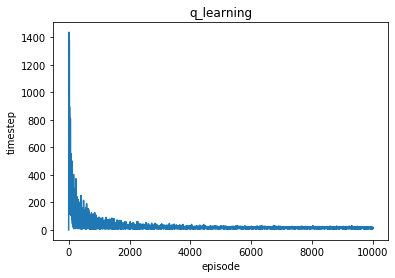

13


In [8]:
#Parameters
# alpha = 0.1
# gamma = 0.6
epsilon = 0.1
#greedy policy
q_table = np.zeros([env.observation_space.n,env.action_space.n])
#gonna write a function here 
episode_limit = 10001
def q_learning(episode_limit,q_table,alpha =0.1,gamma = 0.6):
    y = np.zeros((episode_limit,1))
    for i in range(1,episode_limit):
        state = env.reset() #every single time we reset the enviroment
        epoch,penalty,reward =0,0,0
        done = False
   
        while not done:
            action = choose_a(state)
            next_state,reward,done,info = env.step(action)
            q_table[state,action] = q_table[state,action] + alpha *(reward + gamma * np.max(q_table[next_state])-q_table[state,action])
            if reward == -10:
                penalty += 1
            state = next_state
     
      
            epoch += 1
        y[i] = epoch 
         
#     if i % 100 == 0:
#         clear_output(wait=True)
#         print(f"Episode: {i}")
    return y,epoch

y,epoch= q_learning(episode_limit,q_table,alpha =0.1,gamma = 0.6)

x = np.arange(10001)
plt.plot(x,y)
plt.xlabel('episode')
plt.ylabel('timestep')
plt.title('q_learning')
plt.show()

print(epoch)




      

1


In [27]:
total_penalties,total_epochs =0,0
policy = [np.argmax(i) for i in q_table]
for _ in range(episodes):
    state = env.reset()

    epochs, penalties, reward = 0, 0, 0
     
    done = False
    
    while not done:
        action = choose_a(state)
        state,reward,done,info = env.step(action)
      

        if reward == -10:
            penalties += 1
   

        epochs += 1

    total_penalties += penalties
    total_epochs += epochs

print(f"Results after {episodes} episodes:")
print(f"Average timesteps per episode: {total_epochs / episodes}")
print(f"Average penalties per episode: {total_penalties / episodes}")

Results after 100 episodes:
Average timesteps per episode: 19.58
Average penalties per episode: 0.56


In [ ]:
for i in q_table:
    print (i)


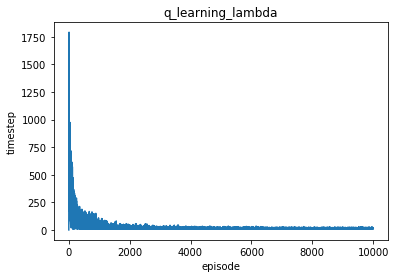

17


In [20]:
q_table = np.zeros([env.observation_space.n,env.action_space.n])
#gonna write a function here 
episode_limit = 10001
def q_learning_lambda(episode_limit,q_table,alpha =0.1,gamma = 0.6,lam = 0.5):
    y = np.zeros((episode_limit,1))

    for i in range(1,episode_limit):
        state = env.reset() #every single time we reset the enviroment
        epoch,penalty,reward =0,0,0
        done = False
        e = np.zeros([env.observation_space.n,env.action_space.n])
   
        while not done:
            action = choose_a(state)
            next_state,reward,done,info = env.step(action)
            next_action = choose_a(next_state)
            best_a = np.argmax(q_table[next_state])
            error = reward + gamma * q_table[next_state,best_a] - q_table[state,action]
            e[state,action] += 1
            q_table[state,action] += alpha * error * e[state,action]
            if next_action == best_a:
                e[state,action] = gamma * lam * e[state,action]
            else:
                e[state,action] = 0
            if reward == -10:
                penalty += 1
            state = next_state
     
      
            epoch += 1
        y[i] = epoch 
         
#     if i % 100 == 0:
#         clear_output(wait=True)
#         print(f"Episode: {i}")
    return y,epoch

y1,epoch = q_learning_lambda(episode_limit,q_table,alpha =0.1,gamma = 0.6,lam = 0.5)

x1 = np.arange(10001)
plt.plot(x1,y1)
plt.xlabel('episode')
plt.ylabel('timestep')
plt.title('q_learning_lambda')
plt.show()
print(epoch)




In [ ]:
#policy=[np.argmax(q_table[i]) for i in q_table]



In [ ]:
# print(f"Results after {episodes} episodes:")
# print(f"Average timesteps per episode: {total_epochs / episodes}")
# print(f"Average penalties per episode: {total_penalties / episodes}")


In [21]:
#this function is used for visualization
def generate_frames(start_state,q_table):
    env.s = start_state
    s = start_state
    policy = [np.argmax(i) for i in q_table]
    epochs = 0
    penalties, reward = 0, 0
    frames = [] 
    done = False
    frames.append({
        'frame': env.render(mode='ansi'),
        'state':  env.s ,
        'action': "Start",
        'reward': 0
        }
    )
    while not done:
        a = policy[s]
        s, reward, done, info = env.step(a)
        if reward == -10:
            penalties += 1

        # Put each rendered frame into dict for animation
        frames.append({
            'frame': env.render(mode='ansi'),
            'state': s,
            'action': a,
            'reward': reward
            }
        )
        epochs += 1
    print("Timesteps taken: {}".format(epochs))
    print("Penalties incurred: {}".format(penalties))
    return frames
frames = generate_frames(411,q_table)
from time import sleep
def print_frames(frames):
    for i, frame in enumerate(frames):
        clear_output(wait=True)
        print(frame['frame'])
        print(f"Timestep: {i + 1}")
        print(f"State: {frame['state']}")
        print(f"Action: {frame['action']}")
        print(f"Reward: {frame['reward']}")
        sleep(.4)
print_frames(frames)

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Dropoff)

Timestep: 10
State: 475
Action: 5
Reward: 20


In [ ]:
#operating system: Processor 1.8GHZ , Memory 8GB